In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model 

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_ground_cricket = pd.DataFrame(ground_cricket_data)

In [3]:
lin_reg_ground_cricket = linear_model.LinearRegression()
ground_temp = df_ground_cricket[['Ground Temperature']]
chirps_sec = df_ground_cricket['Chirps/Second']
lin_reg_ground_cricket.fit(ground_temp, chirps_sec)

LinearRegression()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

### Ground Cricket Chirps, Task 1
Find the linear regression equation for this data.


In [4]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(lin_reg_ground_cricket.coef_[0], lin_reg_ground_cricket.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


### Ground Cricket Chirps, Task 2

Chart the original data and the equation on the chart.


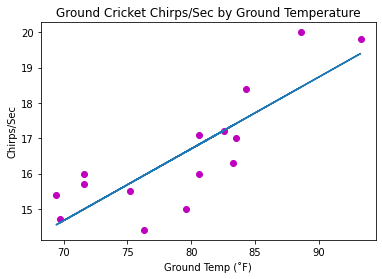

In [5]:
plt.scatter(ground_temp, chirps_sec, color='m')
plt.plot(ground_temp, lin_reg_ground_cricket.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

### Ground Cricket Chirps, Task 3
Find the equation's $R^2$ score (use the `.score` method) to determine whether the 
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [6]:
print("Equation's R^2 score : {:.4f}"
      .format(lin_reg_ground_cricket.score(ground_temp, chirps_sec)))
      
print("\nBecause {:.4f} is below 0.8, this is not a good fit for this data."
      .format(lin_reg_ground_cricket.score(ground_temp, chirps_sec)))


Equation's R^2 score : 0.6923

Because 0.6923 is below 0.8, this is not a good fit for this data.


### Ground Cricket Chirps, Task 4

Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
 

In [7]:
extrapol= lin_reg_ground_cricket.predict([[95]])
print('At 95˚F, approximation rate of chirps/sec is:',extrapol)

At 95˚F, approximation rate of chirps/sec is: [19.74428913]


c:\Users\keyur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Ground Cricket Chirps, Task 5

Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

> y = m * x + b

> y - b = m * x

> x = (y - b) / m

In [8]:
y = 18 
ret = (y - lin_reg_ground_cricket.intercept_) / lin_reg_ground_cricket.coef_[0]
print('With an observation of {} chirps/sec, '
      'we expect a ground temp of {:.2f}˚F'.format(y, ret))

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F
